# Non-linear Modelling

### Notebook Summary
 This notebook explores non-linear modeling by implementing a Decision Tree Regressor to predict house prices. Building on the limitations observed in linear models, the goal is to capture complex, non-linear relationships between features and the target variable. The Decision Tree model is trained and evaluated to assess improvements in predictive performance, address non-linear interactions, and better handle feature importance. 


## Notebook Setup

In [31]:
# Standard imports
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as stats

# Loading sklearn functionality
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Set global random seed for reproducibility
random_seed_val = 42
np.random.seed(random_seed_val)

## Data Loading & Understanding

In [2]:
# Creating DataFrame
pp_house_df = pd.read_csv(r'C:\Users\sanja\capstone-SanjayRaju2000\src\data\london_house_price_data_pp.csv')
# Viewing DataFrame
pp_house_df.head(5)

,latitude,longitude,bathrooms,floorAreaSqM,livingRooms,saleEstimate_currentPrice,tenure_Feudal,tenure_Leasehold,tenure_Shared,propertyType_Detached,propertyType_Semi-Detached,propertyType_Terraced,currentEnergyRating_encoded
0,51.495505,-0.132379,2.0,71.0,1.0,759000.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
1,51.478185,-0.092201,1.0,64.0,1.0,388000.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0
2,51.588774,-0.139599,1.0,137.0,2.0,1261000.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
3,51.466089,0.006967,1.0,97.0,1.0,944000.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,51.451327,-0.007569,1.0,135.0,2.0,726000.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [3]:
# Columns and data types
pp_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265193 entries, 0 to 265192
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   latitude                     265193 non-null  float64
 1   longitude                    265193 non-null  float64
 2   bathrooms                    265193 non-null  float64
 3   floorAreaSqM                 265193 non-null  float64
 4   livingRooms                  265193 non-null  float64
 5   saleEstimate_currentPrice    265193 non-null  float64
 6   tenure_Feudal                265193 non-null  float64
 7   tenure_Leasehold             265193 non-null  float64
 8   tenure_Shared                265193 non-null  float64
 9   propertyType_Detached        265193 non-null  float64
 10  propertyType_Semi-Detached   265193 non-null  float64
 11  propertyType_Terraced        265193 non-null  float64
 12  currentEnergyRating_encoded  265193 non-null  float64
dtyp

In [4]:
# Shape of the DataFrame
pp_house_df.shape

(265193, 13)

## Preparing Data

In [5]:
# Seperating features from target
X = pp_house_df.drop('saleEstimate_currentPrice', axis=1)
y = pp_house_df['saleEstimate_currentPrice']

In [6]:
# Remainder test split
X_remainder, X_test, y_remainder, y_test = train_test_split(X, y, test_size=0.20, random_state=random_seed_val)

# Train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_remainder, y_remainder, test_size=0.20, random_state=random_seed_val)

# Checking size of split
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_valid)}") 
print(f"Test set size: {len(X_test)}")

Training set size: 169723
Validation set size: 42431
Test set size: 53039


## Decision Tree Regressor 
The Decision Tree Regressor is an appropriate model as it captures complex, non-linear relationships without requiring feature transformation. Unlike linear models, which impose a global linearity assumption, decision trees recursively partition the feature space into homogenous regions, enabling them to model feature interactions and non-additive effects. As an interpretable, low-bias, high-variance model, Decision Trees offer a strong baseline for non-linear regression, providing insights into feature importance and guiding further optimization through hyperparameter tuning or ensemble methods.

#### Decision Tree Regressor - Baseline

In [10]:
# Decision tree of max depth of five

# Instantiate and fit model
dt_md5 = DecisionTreeRegressor(max_depth = 5)
dt_md5.fit(X_train, y_train)

# Prediction score 
dt_md5_predict = dt_md5.predict(X_valid)

# Calculate R-squared for evaluation
r2_valid = r2_score(y_valid, dt_md5_predict)
print(f"R-Squared:{r2_valid:.4f}")

# Calculate Coefficient of Variation Root Mean Squared Error
mse = mean_squared_error(y_true=y_valid, y_pred=dt_md5_predict)
rmse = math.sqrt(mse)
rmse_coeff_var = (rmse/np.mean(y_valid))
print(f"The Coefficient of Variation Root Mean Squared Error: {rmse_coeff_var:.4f}")

# Calculate Normalised Mean Absolute Error
mae = mean_absolute_error(y_true=y_valid, y_pred=dt_md5_predict)
norm_mae = (mae/np.mean(y_valid))
print(f"The Normalised Mean Absolute Error: {norm_mae:.4f}")


R-Squared:0.7051
The Coefficient of Variation Root Mean Squared Error: 0.5007
The Normalised Mean Absolute Error: 0.2730


Shows a stronger fit than previous models, with an R-Squared value of 0.7051 and improved error metrics, which show that  indicating better predictive accuracy as well. However, the model's prediction errors still show room for improvement as they are roughly half the size of the mean of the target, indicating that the model requires further refinement.

Normalised Mean Absolute Error shows that the average prediction error is 27% of the mean value of the target. Showing that it has a relatively high accuracy. Marginal improvement from linear modelling phase overall.

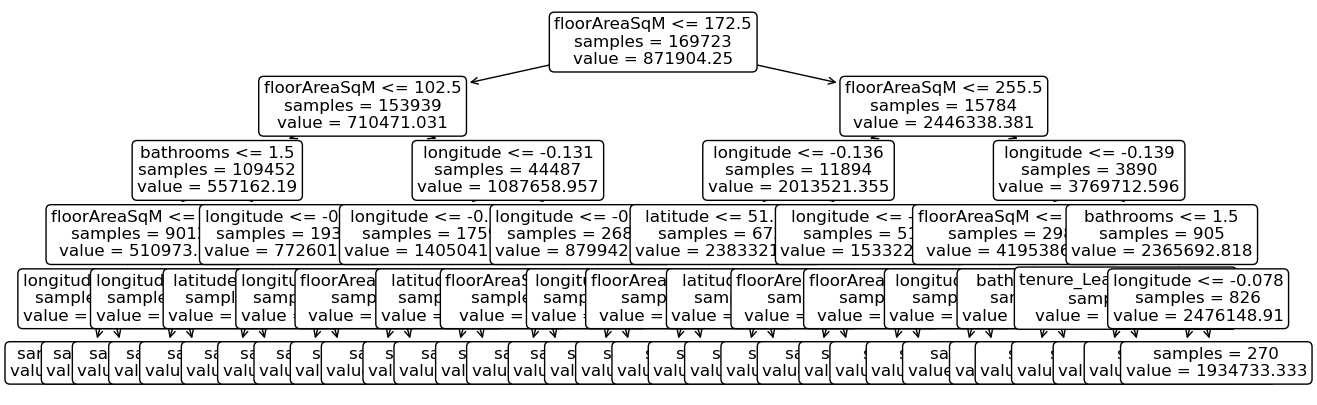

In [9]:
# Visualise inital DTR
fig, ax = plt.subplots(figsize=(15, 5))

plot_tree(
    dt_md5,
    feature_names=X_train.columns.to_list(),
    rounded=True,
    impurity=False,
    filled=False, 
    ax=ax,
    fontsize=12,
)
plt.show()

#### Decision Tree Regressor - Hyperparameter Tuning

##### Train and Validation method

In [12]:
# Tuning Max depth for DTR
depths_list = list(range(1, 50))
r2_train_values = []
r2_valid_values = []

for depth in depths_list:
    decision_tree_model = DecisionTreeRegressor(max_depth=depth)
    decision_tree_model.fit(X_train, y_train)

    # Evaluate model on train and valid data
    r2_train_values.append(decision_tree_model.score(X_train, y_train))
    # Evaluate model on train and valid data
    r2_valid_values.append(decision_tree_model.score(X_valid, y_valid))



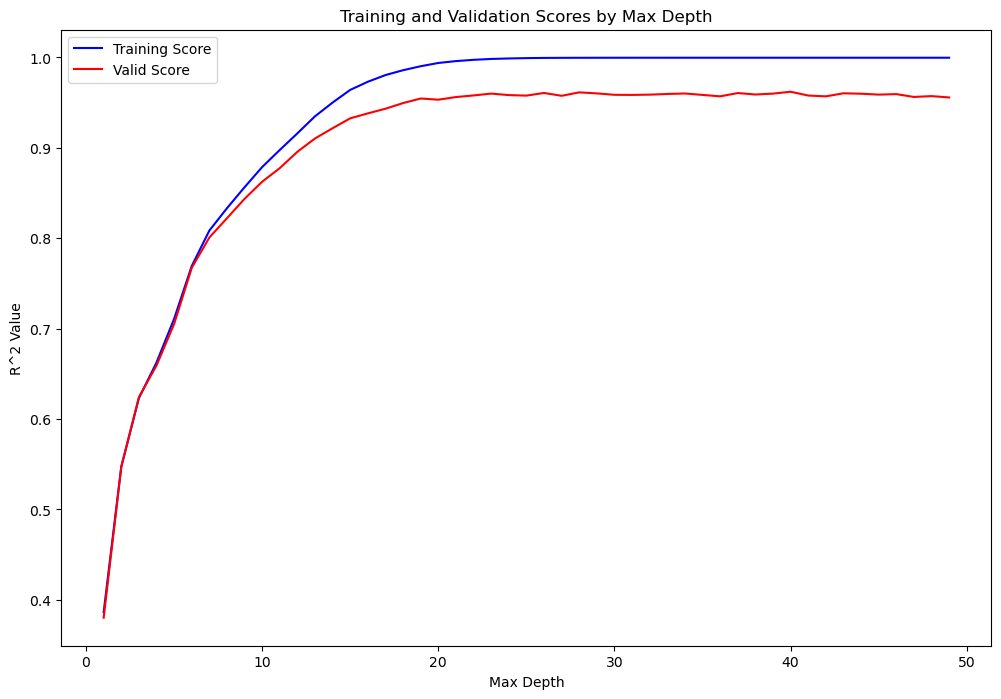

In [16]:
# Plotting
plt.figure(figsize=(12, 8))
#plt.scatter(depths_list, r2_train_values, color='blue', label='Training Score')
#plt.scatter(depths_list, r2_valid_values, color='red', label='Valid Score')
plt.plot(depths_list, r2_train_values, color='blue', label='Training Score')
plt.plot(depths_list, r2_valid_values, color='red', label='Valid Score')

# Labels and Title
plt.xlabel('Max Depth')
plt.ylabel('R^2 Value')
plt.title('Training and Validation Scores by Max Depth')
plt.legend()

# Show plot
plt.show()

- Key insight and takeaway:
  - Training and validation R^2 scores remain closely aligned across different max_depth values.

- Trend description:
  - Only a slight divergence is observed as depth increases, suggesting the model captures additional complexity without overfitting.
  - The training curve reaches an R^2 value of 1 at high max depth values as the model begins to overfit to the training data, as each data point is placed in its own leaf node.
  - The stability of R^2 scores across depths indicates no major bias-variance trade-off issues.

- Modeling insights:
  - The model demonstrates robust predictive capability.
  - Current performance suggests a well-balanced tree that effectively captures non-linear patterns in the data.


##### Cross Validation method

In [17]:
# Tuning Max depth for DTR with CV
cv_depths_list = list(range(1, 50))
r2_values_cv = []


for depth in cv_depths_list:
    decision_tree_model_cv = DecisionTreeRegressor(max_depth=depth)
    # decision_tree_model_cv.fit(X_remainder, y_remainder)

    # The cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(decision_tree_model_cv, X_remainder, y_remainder, cv=5))

    # Evaluate model on train and valid data
    r2_values_cv.append(cv_score)

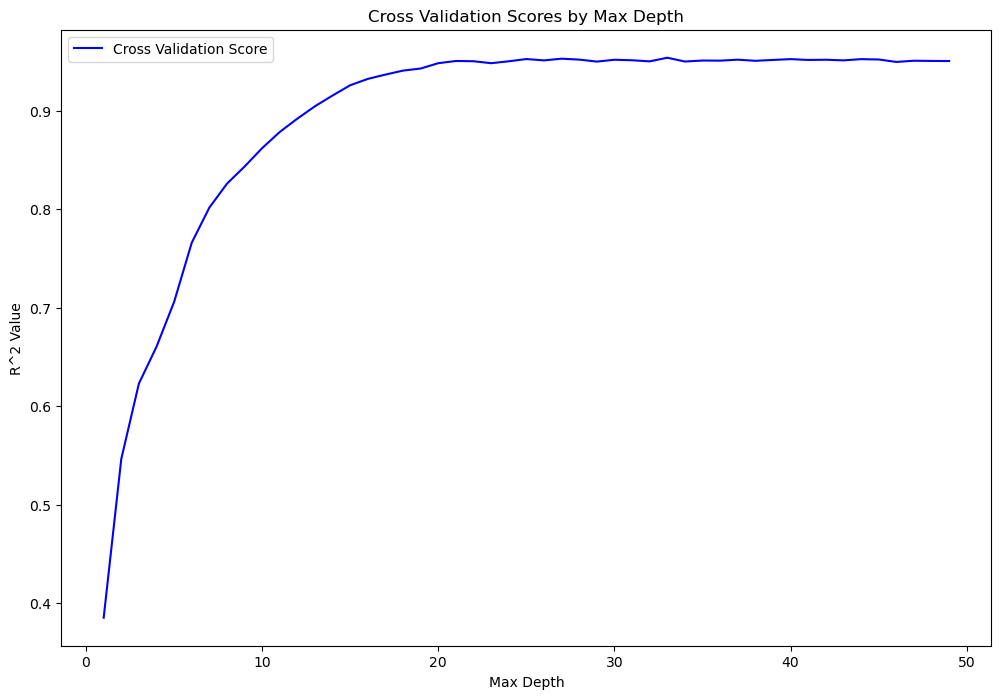

In [18]:
# Plotting
plt.figure(figsize=(12, 8))
#plt.scatter(cv_depths_list, r2_values_cv, color='blue', label='Cross Validation Score')
plt.plot(cv_depths_list, r2_values_cv, color='blue', label='Cross Validation Score')

# Labels and Title
plt.xlabel('Max Depth')
plt.ylabel('R^2 Value')
plt.title('Cross Validation Scores by Max Depth')
plt.legend()

# Show plot
plt.show()

- Key insight and takeaway:
  - The model reaches optimal complexity at a max_depth of around 20.
  - No signs of overfitting are observed within the tested max_depth range.

- Trend description:
  - R^2 values plateau from max_depth 20 to 50, suggesting that additional splits do not improve model performance.
  - The stability across this range indicates the model has captured the underlying patterns without unnecessary complexity.

- Modeling insights:
  - Further increasing max_depth beyond 20 does not enhance performance, implying a natural limit to the model’s complexity.
  - The absence of R^2 decline shows that the model generalizes well across different folds.
  - Final model tuning should focus on selecting a depth close to 20 to maintain simplicity and prevent overfitting.


#### Decision Tree Regressor - Optimal

In [ ]:
# Decision tree of max depth of 20 (optimal max_depth)

# Instantiate and fit model
dt_md20 = DecisionTreeRegressor(max_depth = 20)
dt_md20.fit(X_train, y_train)

# Prediction score 
dt_md20_predict = dt_md20.predict(X_valid)

# Evaluation metrics

# Calculate R-squared for evaluation
r2_valid_opt = r2_score(y_valid, dt_md20_predict)
print(f"R-Squared:{r2_valid_opt:.4f}")

# Calculate Coefficient of Variation Root Mean Squared Error
mse_opt = mean_squared_error(y_true=y_valid, y_pred=dt_md20_predict)
rmse_opt = math.sqrt(mse_opt)
rmse_coeff_var_opt = (rmse_opt/np.mean(y_valid))
print(f"The Coefficient of Variation Root Mean Squared Error: {rmse_coeff_var_opt:.4f}")

# Calculate Normalised Mean Absolute Error
mae_opt = mean_absolute_error(y_true=y_valid, y_pred=dt_md20_predict)
norm_mae_opt = (mae_opt/np.mean(y_valid))
print(f"The Normalised Mean Absolute Error: {norm_mae_opt:.4f}")


R-Squared:0.9547
The Coefficient of Variation Root Mean Squared Error: 0.1962
The Normalised Mean Absolute Error: 0.0620


The model demonstrates strong predictive performance, with an R-squared value of 0.9547, indicating it explains approximately 95% of the variance in house prices. The Coefficient of Variation of RMSE is 0.1962, meaning the model’s root mean squared error is around 19.6% of the average house price, reflecting low relative error and good precision. Additionally, the Normalized Mean Absolute Error of 0.0620 shows that the model’s average prediction deviates by only 6.2% of the target range. Together, these metrics indicate that the model achieves high accuracy, generalizes well, and provides reliable predictions across the dataset.

##### Feature importance

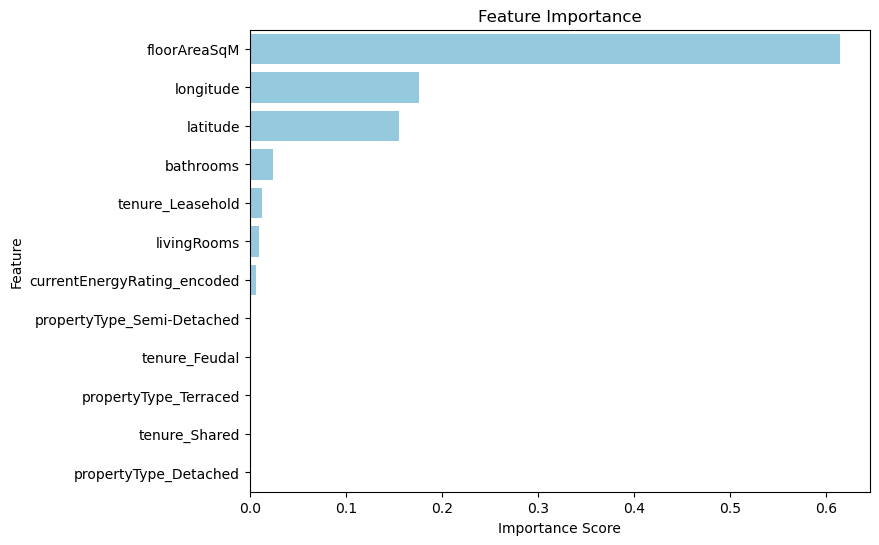

In [25]:
# DataFrame
feat_importance = pd.DataFrame({
    'Feature': dt_md20.feature_names_in_,
    'Importance': dt_md20.feature_importances_
})

# Sort the features by importance
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot with Seaborn
plt.figure(figsize=(8, 6))  
sns.barplot(
    x='Importance',
    y ='Feature',
    data=feat_importance,
    color='skyblue'  
)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

The feature importance plot shows which variables had the greatest impact on the decision tree model's predictions. The floor square area stands out as the most important feature, with the largest bar on the plot, indicating that it played the biggest role in the model’s decision-making process. Following this, longitude and latitude also show high importance, suggesting that the property’s location significantly influenced the model’s predictions. Other features, such as the number of bathrooms, also contributed but to a lesser extent. Overall, the plot highlights that both the size and location of the property are the primary drivers in the model’s ability to make accurate predictions.

##### Further Evaluation of Optimal Model

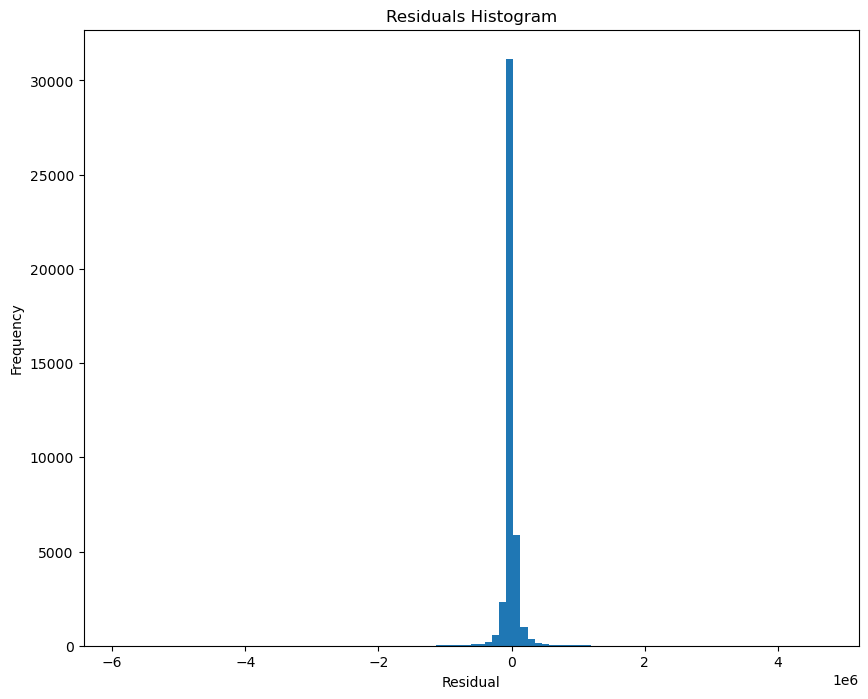

In [35]:
# Predict on validation set
y_pred = dt_md20.predict(X_valid)

# Residuals (true - predicted)
residuals = y_valid - y_pred

# Plot histogram of residuals
plt.figure(figsize=(10, 8))
plt.hist(residuals, bins=100)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

Histogram of Residuals Plot Observations:

Shows a normal distribution with minimal skewness, indicating a good model fit and low bias. Compared to the linear models, the residuals are more tightly concentrated around zero, suggesting that the Decision Tree produces more consistent and accurate predictions with lower overall error.

In [32]:
# Calculate mean and standard deviation
ridge_norm_mean_residual = (np.mean(residuals)/np.mean(y_valid)) 
ridge_norm_std_residual = (np.std(residuals)/np.mean(y_valid))

print(f"Normalised mean of residuals: {ridge_norm_mean_residual:.4f}")
print(f"Normalised standard deviation of residuals: {ridge_norm_std_residual:.4f}")

Normalised mean of residuals: -0.0013
Normalised standard deviation of residuals: 0.1962


The Optimal Decision Tree model performs well, with a normalized mean of residuals close to zero (-0.0013), indicating no prediction bias. The normalized standard deviation of 0.1962 shows low error spread relative to the target, confirming accurate and consistent predictions.

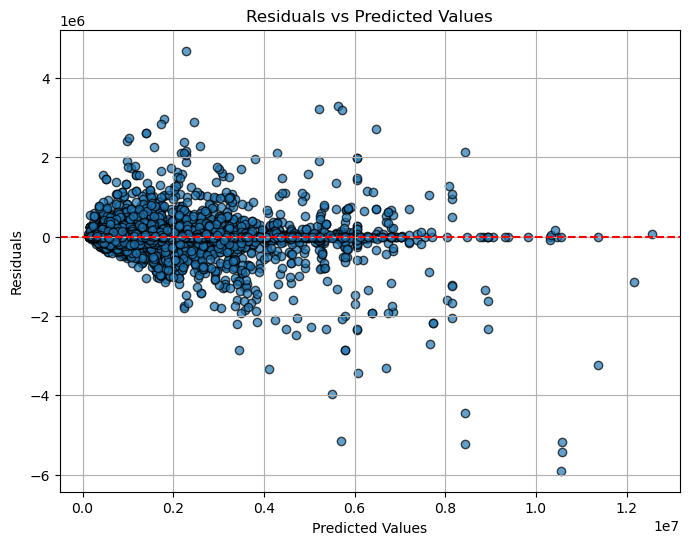

In [29]:
# Plot residuals vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')  # horizontal line at 0
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

Homoscedasticity in a Decision Tree Model is not a typical requirement due to the segmentation of data in their processes, which naturally handles heteroscedasticity.

## Random Forest Regressor Model
A Random Forest Regressor builds multiple decision trees and aggregates their predictions to form a single, robust model. By combining the results from many smaller trees, it improves overall accuracy and reduces variance, making the model more stable and less prone to overfitting. The final output of the Random Forest is the average of all predictions made by the individual decision trees.

#### Random Forest Regressor - Baseline

In [ ]:
# Default params to begin with
# 100 trees
rfr_model = RandomForestRegressor(n_estimators = 100)
rfr_model_fit = rfr_model.fit(X_train, y_train)
print(f"R^2 value for training is {rfr_model_fit.score(X_train, y_train)}")
print(f"R^2 value for validation is {rfr_model_fit.score(X_valid, y_valid)}")

R^2 value for training is 0.9953512614615375
R^2 value for validation is 0.9716990938418397


#### Random Forest Regressor - Hyperparameter Tuning 

In [22]:
# Tuning number of estimators for RFR with CV
cv_estimators_list = [50, 100, 150, 200]
r2_values_rfr_cv = []


for num in cv_estimators_list:
    # model
    rfr_model_cv = RandomForestRegressor(n_estimators = num, max_depth=20)

    # The cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(rfr_model_cv, X_remainder, y_remainder, cv=5))

    # Evaluate model on train and valid data
    r2_values_rfr_cv.append(cv_score)

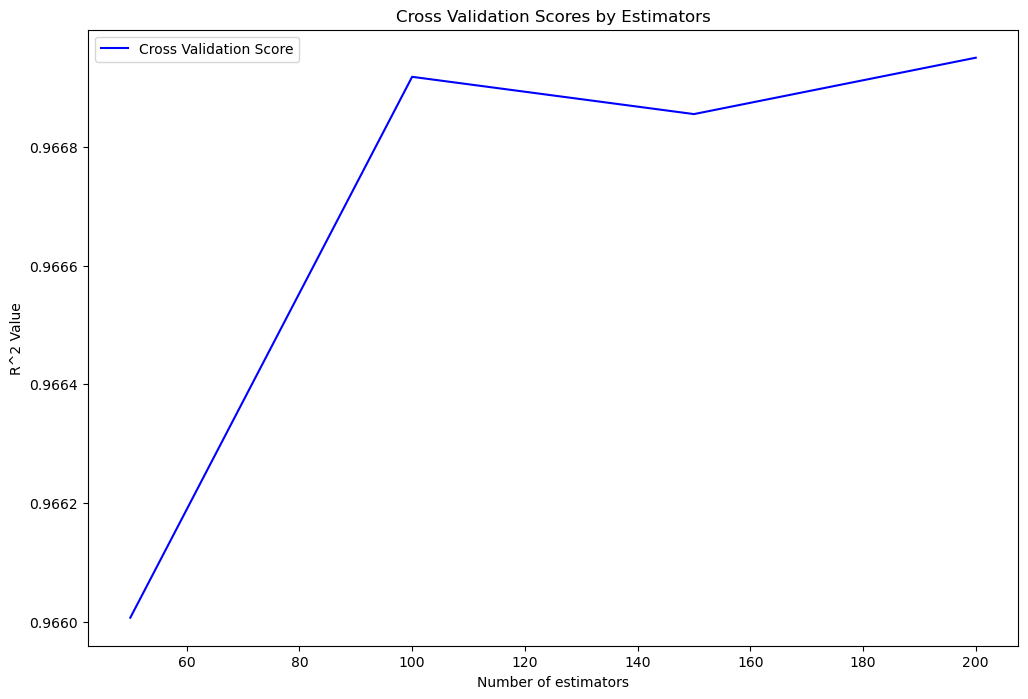

In [23]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(cv_estimators_list, r2_values_rfr_cv, color='blue', label='Cross Validation Score')

# Labels and Title
plt.xlabel('Number of estimators')
plt.ylabel('R^2 Value')
plt.title('Cross Validation Scores by Estimators')
plt.legend()

# Show plot
plt.show()

Increasing the number of estimators does increase the R^2 value. However, the amount at which it increases by in comparison to the R^2 value achieved by the optimal decision tree does not seem very substantial to warrant the continuation of hyperparameter tuning. This process via cross validation is both computationally exhaustive and not time efficient. Therefore, implementation of this model will be halted.

### Non-linear Modelling Conclusion

The non-linear modeling process identified a Decision Tree Regressor with a max_depth of 20 as the optimal model. This model achieved a high R-squared value alongside low normalized error metrics, indicating strong predictive accuracy and generalization to unseen data. The training and validation scores remained closely aligned, with no significant signs of overfitting. The cross-validation results further confirmed the model's stability, showing a clear plateau in performance beyond a depth of 20. This is the model which is to be used for fianl predictions of housing prices given the room for minimal improvement.
